In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [80]:
pathfile=r'data_anonymous'

# reflist: list of epc in each box
reflist=pd.DataFrame()
# On ajoute tout les fichiers dans files
files=os.listdir(pathfile)
for file in files:
    print(file)
    if file.startswith('reflist_'):
        temp=pd.read_csv(os.path.join(pathfile,file),sep=',').reset_index(drop=True)[['Epc']]
        temp['refListId']=file.split('.')[0]
        reflist=reflist.append(temp)
reflist=reflist.rename(columns={'refListId':'refListId_actual'})
reflist['refListId_actual']=reflist['refListId_actual'].apply(lambda x:int(x[8:]))
Q_refListId_actual=reflist.groupby('refListId_actual')['Epc'].nunique().rename('Q refListId_actual').reset_index(drop=False)
reflist=pd.merge(reflist,Q_refListId_actual,on='refListId_actual',how='left')
reflist

reflist_0.olpn
ano_APTags-TagsAutomatedProcess-2019-11-07-18_38_19.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-19_10_51.csv
reflist_1.olpn
ano_APTags-TagsAutomatedProcess-2019-11-07-16_29_46.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_49_44.csv
ano_APTags-TagsAutomatedProcess-2019-11-08-10_55_25.csv
reflist_6.olpn
ano_APTags-TagsAutomatedProcess-2019-11-07-19_00_26.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-17_58_50.csv
reflist_7.olpn
ano_supply-process.2019-11-07-CUT.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-19_29_54.csv
reflist_8.olpn
ano_APTags-TagsAutomatedProcess-2019-11-07-18_21_44.csv
reflist_4.olpn
ano_APTags-TagsAutomatedProcess-2019-11-07-18_30_01.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_13_30.csv
reflist_5.olpn
reflist_9.olpn
reflist_2.olpn
ano_APTags-TagsAutomatedProcess-2019-11-07-17_32_19.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-17_16_18.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-16_57_34.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-

,Epc,refListId_actual,Q refListId_actual
0,epc_90,0,16
1,epc_91,0,16
2,epc_92,0,16
3,epc_93,0,16
4,epc_94,0,16
...,...,...,...
197,epc_187,3,10
198,epc_188,3,10
199,epc_189,3,10
200,epc_190,3,10


In [81]:
# pathfile=r'data_anonymous'
# 
# df : rfid readings
df=pd.DataFrame()
# 
files=os.listdir(pathfile)
for file in files:
    print(file)
    if file.startswith('ano_APTags'):
        temp=pd.read_csv(os.path.join(pathfile,file),sep=',')
        df=df.append(temp)
df['LogTime']=pd.to_datetime(df['LogTime'] ,format='%Y-%m-%d-%H:%M:%S')
df['TimeStamp']=df['TimeStamp'].astype(float)
df['Rssi']=df['Rssi'].astype(float)
df=df.drop(['Reader','EmitPower','Frequency'],axis=1).reset_index(drop=True)
df=df[['LogTime', 'Epc', 'Rssi', 'Ant']]
# antennas 1 and 2 are facing the box when photocell in/out 
Ant_loc=pd.DataFrame({'Ant':[1,2,3,4],'loc':['in','in','out','out']})
df=pd.merge(df,Ant_loc,on=['Ant'])
df=df.sort_values('LogTime').reset_index(drop=True)
df

reflist_0.olpn
ano_APTags-TagsAutomatedProcess-2019-11-07-18_38_19.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-19_10_51.csv
reflist_1.olpn
ano_APTags-TagsAutomatedProcess-2019-11-07-16_29_46.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_49_44.csv
ano_APTags-TagsAutomatedProcess-2019-11-08-10_55_25.csv
reflist_6.olpn
ano_APTags-TagsAutomatedProcess-2019-11-07-19_00_26.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-17_58_50.csv
reflist_7.olpn
ano_supply-process.2019-11-07-CUT.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-19_29_54.csv
reflist_8.olpn
ano_APTags-TagsAutomatedProcess-2019-11-07-18_21_44.csv
reflist_4.olpn
ano_APTags-TagsAutomatedProcess-2019-11-07-18_30_01.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_13_30.csv
reflist_5.olpn
reflist_9.olpn
reflist_2.olpn
ano_APTags-TagsAutomatedProcess-2019-11-07-17_32_19.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-17_16_18.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-16_57_34.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-

,LogTime,Epc,Rssi,Ant,loc
0,2019-11-07 15:32:10,epc_92,-69.0,4,out
1,2019-11-07 15:32:10,epc_100,-69.0,3,out
2,2019-11-07 15:32:10,epc_97,-69.0,3,out
3,2019-11-07 15:32:10,epc_97,-65.0,3,out
4,2019-11-07 15:32:10,epc_99,-70.0,3,out
...,...,...,...,...,...
1203998,2019-11-07 19:44:02,epc_109,-68.0,1,in
1203999,2019-11-07 19:44:02,epc_122,-68.0,1,in
1204000,2019-11-07 19:44:02,epc_109,-67.0,1,in
1204001,2019-11-07 19:44:03,epc_109,-69.0,1,in


In [82]:
len(df)

1204003

In [83]:
# timing: photocells a time window for each box: start/stop (ciuchStart, ciuchStop)
file=r'ano_supply-process.2019-11-07-CUT.csv'
timing=pd.read_csv(os.path.join(pathfile,file),sep=',')
timing['file']=file
timing['date']=pd.to_datetime(timing['date'],format='%d/%m/%Y %H:%M:%S,%f')
timing['ciuchStart']=pd.to_datetime(timing['ciuchStart'],format='%d/%m/%Y %H:%M:%S,%f')
timing['ciuchStop']=pd.to_datetime(timing['ciuchStop'],format='%d/%m/%Y %H:%M:%S,%f')
timing['timestampStart']=timing['timestampStart'].astype(float)
timing['timestampStop']=timing['timestampStop'].astype(float)
timing=timing.sort_values('date')
timing.loc[:,'refListId']=timing.loc[:,'refListId'].apply(lambda x:int(x[8:]))
timing=timing[['refListId', 'ciuchStart', 'ciuchStop']]
timing[:1]
timing

/var/folders/6n/7q_b9g2s03b1blt5jrv9x6000000gn/T/ipykernel_1889/3328896993.py:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  timing.loc[:,'refListId']=timing.loc[:,'refListId'].apply(lambda x:int(x[8:]))


,refListId,ciuchStart,ciuchStop
0,0,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197
1,1,2019-11-07 18:54:02.637,2019-11-07 18:54:04.463
2,2,2019-11-07 18:54:13.587,2019-11-07 18:54:15.447
3,3,2019-11-07 18:54:17.942,2019-11-07 18:54:19.591
4,4,2019-11-07 18:54:23.683,2019-11-07 18:54:25.528
...,...,...,...
384,7,2019-11-07 19:34:22.740,2019-11-07 19:34:24.686
385,8,2019-11-07 19:34:27.950,2019-11-07 19:34:29.670
386,9,2019-11-07 19:34:33.696,2019-11-07 19:34:35.671
387,0,2019-11-07 19:34:39.687,2019-11-07 19:34:41.624


In [84]:
len(timing)

389

In [85]:
timing[:12]

,refListId,ciuchStart,ciuchStop
0,0,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197
1,1,2019-11-07 18:54:02.637,2019-11-07 18:54:04.463
2,2,2019-11-07 18:54:13.587,2019-11-07 18:54:15.447
3,3,2019-11-07 18:54:17.942,2019-11-07 18:54:19.591
4,4,2019-11-07 18:54:23.683,2019-11-07 18:54:25.528
5,5,2019-11-07 18:54:29.422,2019-11-07 18:54:31.278
6,6,2019-11-07 18:54:34.953,2019-11-07 18:54:36.685
7,7,2019-11-07 18:54:40.829,2019-11-07 18:54:42.611
8,8,2019-11-07 18:54:46.383,2019-11-07 18:54:48.158
9,9,2019-11-07 18:54:52.122,2019-11-07 18:54:54.051


In [86]:
# ciuchStart_up starts upstream ciuchStart, half way in between the previous stop and the actual start
timing[['ciuchStop_last']]=timing[['ciuchStop']].shift(1) #Décale les index de 1
timing[['refListId_last']]=timing[['refListId']].shift(1)
timing['ciuchStartup']=timing['ciuchStart'] - (timing['ciuchStart'] - timing['ciuchStop_last'])/2
# timing start: 10sec before timing
timing.loc[0,'refListId_last']=timing.loc[0,'refListId']
timing.loc[0,'ciuchStartup']=timing.loc[0,'ciuchStart']-datetime.timedelta(seconds=10)
timing.loc[0,'ciuchStop_last']=timing.loc[0,'ciuchStartup']-datetime.timedelta(seconds=10)
timing['refListId_last']=timing['refListId_last'].astype(int)
# 
timing['ciuchStopdown']= timing['ciuchStartup'].shift(-1)
timing.loc[len(timing)-1,'ciuchStopdown']=timing.loc[len(timing)-1,'ciuchStop']+datetime.timedelta(seconds=10)
timing=timing[['refListId', 'refListId_last','ciuchStartup', 'ciuchStart','ciuchStop','ciuchStopdown']]
timing

,refListId,refListId_last,ciuchStartup,ciuchStart,ciuchStop,ciuchStopdown
0,0,0,2019-11-07 18:53:42.370000,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417000
1,1,0,2019-11-07 18:53:58.417000,2019-11-07 18:54:02.637,2019-11-07 18:54:04.463,2019-11-07 18:54:09.025000
2,2,1,2019-11-07 18:54:09.025000,2019-11-07 18:54:13.587,2019-11-07 18:54:15.447,2019-11-07 18:54:16.694500
3,3,2,2019-11-07 18:54:16.694500,2019-11-07 18:54:17.942,2019-11-07 18:54:19.591,2019-11-07 18:54:21.637000
4,4,3,2019-11-07 18:54:21.637000,2019-11-07 18:54:23.683,2019-11-07 18:54:25.528,2019-11-07 18:54:27.475000
...,...,...,...,...,...,...
384,7,6,2019-11-07 19:34:20.697500,2019-11-07 19:34:22.740,2019-11-07 19:34:24.686,2019-11-07 19:34:26.318000
385,8,7,2019-11-07 19:34:26.318000,2019-11-07 19:34:27.950,2019-11-07 19:34:29.670,2019-11-07 19:34:31.683000
386,9,8,2019-11-07 19:34:31.683000,2019-11-07 19:34:33.696,2019-11-07 19:34:35.671,2019-11-07 19:34:37.679000
387,0,9,2019-11-07 19:34:37.679000,2019-11-07 19:34:39.687,2019-11-07 19:34:41.624,2019-11-07 19:34:44.230000


In [87]:
# box 0 always starts
timing[timing['refListId']==0].head()

,refListId,refListId_last,ciuchStartup,ciuchStart,ciuchStop,ciuchStopdown
0,0,0,2019-11-07 18:53:42.370000,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417000
10,0,9,2019-11-07 18:54:55.894500,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765000
20,0,9,2019-11-07 18:55:53.460500,2019-11-07 18:55:55.497,2019-11-07 18:55:57.377,2019-11-07 18:55:59.567500
30,0,9,2019-11-07 18:56:51.317000,2019-11-07 18:56:53.344,2019-11-07 18:56:55.215,2019-11-07 18:56:57.241500
40,0,9,2019-11-07 18:58:02.390500,2019-11-07 18:58:04.351,2019-11-07 18:58:06.212,2019-11-07 18:58:11.428000


In [88]:
# t0_run = a new run starts when box 0 shows up
t0_run=timing[timing['refListId']==0] [['ciuchStartup']]
t0_run=t0_run.rename(columns={'ciuchStartup':'t0_run'})
t0_run=t0_run.groupby('t0_run').size().cumsum().rename('run').reset_index(drop=False)
t0_run=t0_run.sort_values('t0_run')
# 
# each row in timing is merged with a last row in t0_run where t0_run (ciuchstart) <= timing (ciuchstart)
timing=pd.merge_asof(timing,t0_run,left_on='ciuchStartup',right_on='t0_run', direction='backward')
timing=timing.sort_values('ciuchStop')
timing=timing[['run', 'refListId', 'refListId_last', 'ciuchStartup','ciuchStart','ciuchStop','ciuchStopdown','t0_run']]
timing.head()

,run,refListId,refListId_last,ciuchStartup,ciuchStart,ciuchStop,ciuchStopdown,t0_run
0,1,0,0,2019-11-07 18:53:42.370000,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417000,2019-11-07 18:53:42.370
1,1,1,0,2019-11-07 18:53:58.417000,2019-11-07 18:54:02.637,2019-11-07 18:54:04.463,2019-11-07 18:54:09.025000,2019-11-07 18:53:42.370
2,1,2,1,2019-11-07 18:54:09.025000,2019-11-07 18:54:13.587,2019-11-07 18:54:15.447,2019-11-07 18:54:16.694500,2019-11-07 18:53:42.370
3,1,3,2,2019-11-07 18:54:16.694500,2019-11-07 18:54:17.942,2019-11-07 18:54:19.591,2019-11-07 18:54:21.637000,2019-11-07 18:53:42.370
4,1,4,3,2019-11-07 18:54:21.637000,2019-11-07 18:54:23.683,2019-11-07 18:54:25.528,2019-11-07 18:54:27.475000,2019-11-07 18:53:42.370


In [89]:
timing

,run,refListId,refListId_last,ciuchStartup,ciuchStart,ciuchStop,ciuchStopdown,t0_run
0,1,0,0,2019-11-07 18:53:42.370000,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417000,2019-11-07 18:53:42.370000
1,1,1,0,2019-11-07 18:53:58.417000,2019-11-07 18:54:02.637,2019-11-07 18:54:04.463,2019-11-07 18:54:09.025000,2019-11-07 18:53:42.370000
2,1,2,1,2019-11-07 18:54:09.025000,2019-11-07 18:54:13.587,2019-11-07 18:54:15.447,2019-11-07 18:54:16.694500,2019-11-07 18:53:42.370000
3,1,3,2,2019-11-07 18:54:16.694500,2019-11-07 18:54:17.942,2019-11-07 18:54:19.591,2019-11-07 18:54:21.637000,2019-11-07 18:53:42.370000
4,1,4,3,2019-11-07 18:54:21.637000,2019-11-07 18:54:23.683,2019-11-07 18:54:25.528,2019-11-07 18:54:27.475000,2019-11-07 18:53:42.370000
...,...,...,...,...,...,...,...,...
384,39,7,6,2019-11-07 19:34:20.697500,2019-11-07 19:34:22.740,2019-11-07 19:34:24.686,2019-11-07 19:34:26.318000,2019-11-07 19:33:38.447500
385,39,8,7,2019-11-07 19:34:26.318000,2019-11-07 19:34:27.950,2019-11-07 19:34:29.670,2019-11-07 19:34:31.683000,2019-11-07 19:33:38.447500
386,39,9,8,2019-11-07 19:34:31.683000,2019-11-07 19:34:33.696,2019-11-07 19:34:35.671,2019-11-07 19:34:37.679000,2019-11-07 19:33:38.447500
387,40,0,9,2019-11-07 19:34:37.679000,2019-11-07 19:34:39.687,2019-11-07 19:34:41.624,2019-11-07 19:34:44.230000,2019-11-07 19:34:37.679000


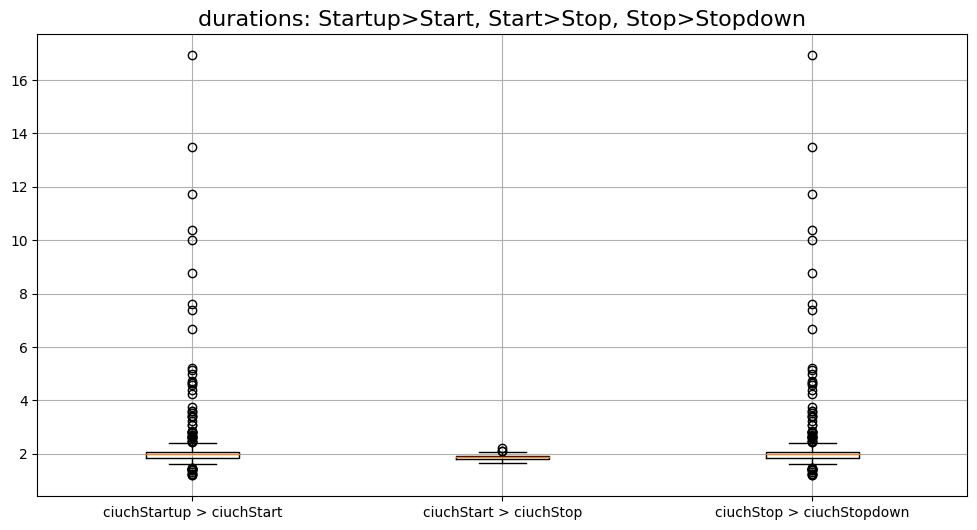

In [90]:
plt.figure(figsize=(12,6))
up=(timing['ciuchStart']-timing['ciuchStartup']).apply(lambda x:x.total_seconds())
mid=(timing['ciuchStop']-timing['ciuchStart']).apply(lambda x:x.total_seconds())
down=(timing['ciuchStopdown']-timing['ciuchStop']).apply(lambda x:x.total_seconds())
plt.boxplot([up,mid,down],labels=['ciuchStartup > ciuchStart','ciuchStart > ciuchStop','ciuchStop > ciuchStopdown'])
plt.grid()
plt.title('durations: Startup>Start, Start>Stop, Stop>Stopdown',size=16)
plt.show()

In [91]:
#  full window (ciuchStartup > ciuchStopdown) is sliced in smaller slices
# ciuchStartup > ciuchStart: 11 slices named up_0, up_1, ..., up_10
# ciuchStart > ciuchStop: 11 slices named mid_0, mid_1, ... mid_10
# ciuchStop > ciuchStopdown: 11 slices names down_0, down_1, ... down_10
slices=pd.DataFrame()
for i, row in timing .iterrows():
    ciuchStartup=row['ciuchStartup']
    ciuchStart=row['ciuchStart']
    ciuchStop=row['ciuchStop']
    ciuchStopdown=row['ciuchStopdown']
    steps=4
#     
    up=pd.DataFrame(index=pd.date_range(start=ciuchStartup, end=ciuchStart,periods=steps,closed='left'))\
        .reset_index(drop=False).rename(columns={'index':'slice'})
    up.index=['up_'+str(x) for x in range(steps-1)]
    slices=slices.append(up)
#     
    mid=pd.DataFrame(index=pd.date_range(start=ciuchStart, end=ciuchStop,periods=steps,closed='left'))\
        .reset_index(drop=False).rename(columns={'index':'slice'})
    mid.index=['mid_'+str(x) for x in range(steps-1)]
    slices=slices.append(mid)
#     
    down=pd.DataFrame(index=pd.date_range(start=ciuchStop, end=ciuchStopdown,periods=steps,closed='left'))\
        .reset_index(drop=False).rename(columns={'index':'slice'})
    down.index=['down_'+str(x) for x in range(steps-1)]
    slices=slices.append(down)
#     slices=slices.append(up)
slices=slices.reset_index(drop=False).rename(columns={'index':'slice_id'})
# 
timing_slices=pd.merge_asof(slices,timing,left_on='slice',right_on='ciuchStartup',direction='backward')
timing_slices=timing_slices[['run', 'refListId', 'refListId_last','slice_id','slice',  \
                             'ciuchStartup', 'ciuchStart', 'ciuchStop', 'ciuchStopdown','t0_run']]
timing_slices

,run,refListId,refListId_last,slice_id,slice,ciuchStartup,ciuchStart,ciuchStop,ciuchStopdown,t0_run
0,1,0,0,up_0,2019-11-07 18:53:42.370000000,2019-11-07 18:53:42.370,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417,2019-11-07 18:53:42.370
1,1,0,0,up_1,2019-11-07 18:53:45.703333333,2019-11-07 18:53:42.370,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417,2019-11-07 18:53:42.370
2,1,0,0,up_2,2019-11-07 18:53:49.036666666,2019-11-07 18:53:42.370,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417,2019-11-07 18:53:42.370
3,1,0,0,mid_0,2019-11-07 18:53:52.370000000,2019-11-07 18:53:42.370,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417,2019-11-07 18:53:42.370
4,1,0,0,mid_1,2019-11-07 18:53:52.979000000,2019-11-07 18:53:42.370,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417,2019-11-07 18:53:42.370
...,...,...,...,...,...,...,...,...,...,...
3496,40,1,0,mid_1,2019-11-07 19:34:47.437000000,2019-11-07 19:34:44.230,2019-11-07 19:34:46.836,2019-11-07 19:34:48.639,2019-11-07 19:34:58.639,2019-11-07 19:34:37.679
3497,40,1,0,mid_2,2019-11-07 19:34:48.038000000,2019-11-07 19:34:44.230,2019-11-07 19:34:46.836,2019-11-07 19:34:48.639,2019-11-07 19:34:58.639,2019-11-07 19:34:37.679
3498,40,1,0,down_0,2019-11-07 19:34:48.639000000,2019-11-07 19:34:44.230,2019-11-07 19:34:46.836,2019-11-07 19:34:48.639,2019-11-07 19:34:58.639,2019-11-07 19:34:37.679
3499,40,1,0,down_1,2019-11-07 19:34:51.972333333,2019-11-07 19:34:44.230,2019-11-07 19:34:46.836,2019-11-07 19:34:48.639,2019-11-07 19:34:58.639,2019-11-07 19:34:37.679


In [92]:
len(timing_slices)

3501

In [93]:
# merge between df and timing
# merge_asof needs sorted df > df_ref
df=df[ (df['LogTime']>=timing['ciuchStartup'].min()) & (df['LogTime']<=timing['ciuchStopdown'].max())  ]
df=df.sort_values('LogTime')
df_reflist =pd.merge(df, reflist, on = 'Epc', how = 'left')
df_reflist = df_reflist[['Epc','LogTime','Rssi','loc','refListId_actual','Q refListId_actual']]
# 
# each row in df_ref is merged with the last row in timing where timing (ciuchstart_up) < df_ref (logtime)
# 
# df_timing=pd.merge_asof(df_ref,timing,left_on=['LogTime'],right_on=['ciuchStartup'],direction='backward')
# df_timing=df_timing.dropna()
# df_timing=df_timing.sort_values('LogTime').reset_index(drop=True)
# df_timing=df_timing[['run', 'Epc','refListId', 'refListId_last', 'ciuchStartup',\
#                      'LogTime', 'ciuchStop', 'ciuchStopdown','Rssi', 'loc', 'refListId_actual']]
# 
# each row in df_ref is merged with the last row in timing_slices where timing (slice) < df_ref (logtime)
# 
df_timing_slices=pd.merge_asof(df_reflist,timing_slices,left_on=['LogTime'],right_on=['slice'],direction='backward')
df_timing_slices=df_timing_slices.dropna()
df_timing_slices=df_timing_slices.sort_values('slice').reset_index(drop=True)
df_timing_slices=df_timing_slices[['run', 'Epc','refListId', 'refListId_last', 'ciuchStartup','slice_id','slice','LogTime',
                                   'ciuchStart','ciuchStop', 'ciuchStopdown', 'Rssi', 'loc','t0_run','refListId_actual']]
df_timing_slices

,run,Epc,refListId,refListId_last,ciuchStartup,slice_id,slice,LogTime,ciuchStart,ciuchStop,ciuchStopdown,Rssi,loc,t0_run,refListId_actual
0,1,epc_135,0,0,2019-11-07 18:53:42.370,up_0,2019-11-07 18:53:42.370000000,2019-11-07 18:53:43,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417,-60.0,out,2019-11-07 18:53:42.370,9
1,1,epc_175,0,0,2019-11-07 18:53:42.370,up_0,2019-11-07 18:53:42.370000000,2019-11-07 18:53:45,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417,-66.0,out,2019-11-07 18:53:42.370,2
2,1,epc_134,0,0,2019-11-07 18:53:42.370,up_0,2019-11-07 18:53:42.370000000,2019-11-07 18:53:45,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417,-58.0,in,2019-11-07 18:53:42.370,9
3,1,epc_135,0,0,2019-11-07 18:53:42.370,up_0,2019-11-07 18:53:42.370000000,2019-11-07 18:53:45,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417,-67.0,in,2019-11-07 18:53:42.370,9
4,1,epc_134,0,0,2019-11-07 18:53:42.370,up_0,2019-11-07 18:53:42.370000000,2019-11-07 18:53:45,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417,-59.0,in,2019-11-07 18:53:42.370,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356063,40,epc_150,1,0,2019-11-07 19:34:44.230,down_2,2019-11-07 19:34:55.305666666,2019-11-07 19:34:57,2019-11-07 19:34:46.836,2019-11-07 19:34:48.639,2019-11-07 19:34:58.639,-71.0,out,2019-11-07 19:34:37.679,2
356064,40,epc_87,1,0,2019-11-07 19:34:44.230,down_2,2019-11-07 19:34:55.305666666,2019-11-07 19:34:57,2019-11-07 19:34:46.836,2019-11-07 19:34:48.639,2019-11-07 19:34:58.639,-69.0,out,2019-11-07 19:34:37.679,4
356065,40,epc_188,1,0,2019-11-07 19:34:44.230,down_2,2019-11-07 19:34:55.305666666,2019-11-07 19:34:57,2019-11-07 19:34:46.836,2019-11-07 19:34:48.639,2019-11-07 19:34:58.639,-59.0,out,2019-11-07 19:34:37.679,3
356066,40,epc_187,1,0,2019-11-07 19:34:44.230,down_2,2019-11-07 19:34:55.305666666,2019-11-07 19:34:57,2019-11-07 19:34:46.836,2019-11-07 19:34:48.639,2019-11-07 19:34:58.639,-65.0,out,2019-11-07 19:34:37.679,3


In [94]:
# 

In [95]:
# df_timing_slices=pd.merge(df_timing_slices, reflist, on='Epc',how='left')
# df_timing_slices = df_timing_slices [ ~((df_timing_slices['refListId']==0) & (df_timing_slices['refListId_actual']==9)) ]
# #
# df_timing_slices = df_timing_slices [ ~((df_timing_slices['refListId']==9) & (df_timing_slices['refListId_actual']==0)) ]
# # # 
# # df_timing_slices = df_timing_slices [ ~((df_timing_slices['refListId']==0) | (df_timing_slices['refListId_actual']==0)) ]

# df_timing_slices=df_timing_slices.drop(['refListId_actual','Q refListId_actual'],axis=1)

In [96]:
runs_out=df_timing_slices.groupby('run')['refListId'].nunique().rename('Q refListId').reset_index(drop=False)
runs_out[runs_out['Q refListId']!=10]

,run,Q refListId
15,16,9
22,23,9
31,32,9
39,40,2


In [97]:
current_last_windows=timing_slices.drop_duplicates(['run','refListId','refListId_last'])
current_last_windows=current_last_windows[['run','refListId','refListId_last','ciuchStop']].reset_index(drop=True)
current_last_windows[:1]

,run,refListId,refListId_last,ciuchStop
0,1,0,0,2019-11-07 18:53:54.197


In [98]:
# runs 16 23 32 40 have missing boxes: discarded
# also run 1 is the start, no previous box: discarded
# run 18: box 0 run at the end
# 
timing=timing[~timing['run'].isin([1,18,16,23,32,40])]
timing_slices=timing_slices[~timing_slices['run'].isin([1,18,16,23,32,40])]
df_timing_slices=df_timing_slices[~df_timing_slices['run'].isin([1,18,16,23,32,40])]

df_timing_slices=df_timing_slices.sort_values(['LogTime','Epc'])
# 

In [99]:
len(timing),len(timing_slices), len(df_timing_slices)

(340, 3060, 307965)

In [100]:
df_timing_slices[:1]

,run,Epc,refListId,refListId_last,ciuchStartup,slice_id,slice,LogTime,ciuchStart,ciuchStop,ciuchStopdown,Rssi,loc,t0_run,refListId_actual
8978,2,epc_100,0,9,2019-11-07 18:54:55.894500,up_0,2019-11-07 18:54:55.894500,2019-11-07 18:54:56,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765,-54.0,out,2019-11-07 18:54:55.894500,0


In [101]:
# df_timing_slices['dt']=
df_timing_slices['dt']=(df_timing_slices['LogTime']-df_timing_slices['t0_run']).apply(lambda x:x.total_seconds())

In [102]:
df_timing_slices[:1]

,run,Epc,refListId,refListId_last,ciuchStartup,slice_id,slice,LogTime,ciuchStart,ciuchStop,ciuchStopdown,Rssi,loc,t0_run,refListId_actual,dt
8978,2,epc_100,0,9,2019-11-07 18:54:55.894500,up_0,2019-11-07 18:54:55.894500,2019-11-07 18:54:56,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765,-54.0,out,2019-11-07 18:54:55.894500,0,0.1055


In [103]:
# 
# df_timing_threshold
# 

In [104]:
rssi_threshold=-110
df_timing_slices_threshold=df_timing_slices[df_timing_slices['Rssi']>rssi_threshold]

In [105]:
# readrate
readrate = round(100*df_timing_slices_threshold.reset_index(drop=False).groupby(['run','loc'])['Epc'].nunique().groupby('loc').mean()\
    /reflist['Epc'].nunique(),2)
readrate

loc
in     100.00
out     99.29
Name: Epc, dtype: float64

In [106]:
df_timing_slices['window_run_id'] = df_timing_slices.apply(lambda row: str(row['refListId']) + '_' + str(row['run']), axis=1)
df_timing_slices

,run,Epc,refListId,refListId_last,ciuchStartup,slice_id,slice,LogTime,ciuchStart,ciuchStop,ciuchStopdown,Rssi,loc,t0_run,refListId_actual,dt,window_run_id
8978,2,epc_100,0,9,2019-11-07 18:54:55.894500,up_0,2019-11-07 18:54:55.894500000,2019-11-07 18:54:56,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765,-54.0,out,2019-11-07 18:54:55.894500,0,0.1055,0_2
9014,2,epc_100,0,9,2019-11-07 18:54:55.894500,up_0,2019-11-07 18:54:55.894500000,2019-11-07 18:54:56,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765,-69.0,in,2019-11-07 18:54:55.894500,0,0.1055,0_2
9044,2,epc_100,0,9,2019-11-07 18:54:55.894500,up_0,2019-11-07 18:54:55.894500000,2019-11-07 18:54:56,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765,-50.0,out,2019-11-07 18:54:55.894500,0,0.1055,0_2
9047,2,epc_100,0,9,2019-11-07 18:54:55.894500,up_0,2019-11-07 18:54:55.894500000,2019-11-07 18:54:56,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765,-47.0,out,2019-11-07 18:54:55.894500,0,0.1055,0_2
9084,2,epc_100,0,9,2019-11-07 18:54:55.894500,up_0,2019-11-07 18:54:55.894500000,2019-11-07 18:54:56,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765,-68.0,in,2019-11-07 18:54:55.894500,0,0.1055,0_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354252,39,epc_99,9,8,2019-11-07 19:34:31.683000,down_1,2019-11-07 19:34:36.340333333,2019-11-07 19:34:37,2019-11-07 19:34:33.696,2019-11-07 19:34:35.671,2019-11-07 19:34:37.679,-51.0,out,2019-11-07 19:33:38.447500,0,58.5525,9_39
354264,39,epc_99,9,8,2019-11-07 19:34:31.683000,down_1,2019-11-07 19:34:36.340333333,2019-11-07 19:34:37,2019-11-07 19:34:33.696,2019-11-07 19:34:35.671,2019-11-07 19:34:37.679,-62.0,in,2019-11-07 19:33:38.447500,0,58.5525,9_39
354348,39,epc_99,9,8,2019-11-07 19:34:31.683000,down_1,2019-11-07 19:34:36.340333333,2019-11-07 19:34:37,2019-11-07 19:34:33.696,2019-11-07 19:34:35.671,2019-11-07 19:34:37.679,-49.0,out,2019-11-07 19:33:38.447500,0,58.5525,9_39
354349,39,epc_99,9,8,2019-11-07 19:34:31.683000,down_1,2019-11-07 19:34:36.340333333,2019-11-07 19:34:37,2019-11-07 19:34:33.696,2019-11-07 19:34:35.671,2019-11-07 19:34:37.679,-49.0,out,2019-11-07 19:33:38.447500,0,58.5525,9_39


In [107]:
def analytical (tags, subslices):
    # Groupe les données de tags par Epc, window_run_id, slice_id et loc et calcule la valeur maximale de Rssi pour chaque groupe
    # Les résultats sont stockés dans une table pivotante
    ana = tags.groupby(['Epc', 'window_run_id', 'slice_id', 'loc'])['Rssi'].max().unstack('loc', fill_value=-110).reset_index(drop=False)

    # Crée une table contenant une liste unique de tous les slice_id et leur ordre
    order=pd.DataFrame(subslices['slice_id' ].unique (), columns=['slice_id'])
    order['order']=order.index

    # Effectue une jointure entre ana et order pour obtenir l'ordre de chaque subslice_id
    ana=pd.merge (ana, order, on='slice_id', how='left')

    # Sélectionne uniquement les colonnes importantes
    ana = ana [['Epc', 'window_run_id', 'slice_id', 'in', 'out', 'order']]

    # Sélectionne les sous-slices qui ont un "out" plus grand que "in" et les trie par ordre décroissant pour chaque Epc et window_run_id
    # Supprime les doublons pour chaque Epc et window_run_id et stocke le résultat dans ana_out
    ana_out=ana[ ana['out']>ana['in'] ].sort_values (['Epc', 'window_run_id', 'order'], ascending=False).drop_duplicates (['Epc', 'window_run_id'])

    # Sélectionne les sous-slices qui ont un "in" plus grand que "out" et les trie par ordre croissant pour chaque Epc et window_run_id
    # Supprime les doublons pour chaque Epc et window_run_id et stocke le résultat dans ana_in
    ana_in=ana[ ana['in']>ana['out'] ].sort_values (['Epc', 'window_run_id', 'order'], ascending=True).drop_duplicates (['Epc', 'window_run_id'])

    # Effectue une jointure entre ana_in et ana_out pour obtenir les données de chaque Epc et window_run_id qui ont des in et out valides
    # Stocke le résultat dans ana
    ana = pd.merge(ana_in, ana_out, on=['Epc', 'window_run_id'], suffixes=['_IN', '_OUT'], how='inner').sort_values (['Epc', 'window_run_id'])

    # Effectue une jointure entre ana et reflist pour ajouter des informations de référence sur chaque Epc
    ana = pd.merge(ana, reflist, on='Epc', how='left')

    # Crée une colonne booléenne indiquant si le prédicteur est égal à la référence
    ana['pred_ana_bool'] = ana['window_run_id'].apply(lambda x:x.split('_')[0]).str.strip() == ana['refListId_actual'].astype(str).str.strip()

    # Renvoie la table ana
    return ana

In [108]:
test = analytical(df_timing_slices, timing_slices)

In [109]:
test

,Epc,window_run_id,slice_id_IN,in_IN,out_IN,order_IN,slice_id_OUT,in_OUT,out_OUT,order_OUT,refListId_actual,Q refListId_actual,pred_ana_bool
0,epc_0,5_10,up_2,-51.0,-110.0,2,up_0,-110.0,-47.0,0,5,40,True
1,epc_0,5_11,up_2,-49.0,-69.0,2,up_1,-63.0,-47.0,1,5,40,True
2,epc_0,5_12,up_2,-56.0,-63.0,2,up_0,-110.0,-46.0,0,5,40,True
3,epc_0,5_13,up_2,-50.0,-110.0,2,up_0,-64.0,-45.0,0,5,40,True
4,epc_0,5_14,mid_0,-51.0,-110.0,3,up_1,-67.0,-47.0,1,5,40,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6521,epc_99,0_7,up_2,-51.0,-62.0,2,up_1,-55.0,-49.0,1,0,16,True
6522,epc_99,0_8,up_2,-52.0,-60.0,2,up_0,-61.0,-48.0,0,0,16,True
6523,epc_99,0_9,up_2,-44.0,-61.0,2,up_1,-59.0,-48.0,1,0,16,True
6524,epc_99,1_14,up_1,-62.0,-110.0,1,up_0,-63.0,-62.0,0,0,16,False


In [110]:
"""
def dataset(tags, windows, rssi_quantile):
    # Calcul du quantile de Rssi pour chaque Epc, fenêtre, sous-fenêtre et position
    ds_rssi = tags.groupby(['Epc', 'window_run_id', 'slice_id', 'loc'])['Rssi'].quantile(rssi_quantile)
    ds_rssi = ds_rssi.unstack(['slice_id', 'loc'], fill_value=-110) # Transformation des colonnes slice_id et loc en colonnes pour chaque combinaison de valeurs uniques, avec -110
                                                                    # comme valeur par défaut pour les combinaisons non existantes

    ds_rssi.columns = [x[0]+'_'+x[1] for x in ds_rssi.columns]  # Renommage des colonnes
    ds_rssi = ds_rssi.reset_index(drop=False)  # Réinitialisation de l'index

    # Comptage du nombre de lectures pour chaque Epc, fenêtre, sous-fenêtre et position
    ds_rc = tags.groupby(['Epc', 'window_run_id', 'slice_id', 'loc']).size()
    ds_rc = ds_rc.unstack(['slice_id', 'loc'], fill_value=0)

    ds_rc.columns = [x[0] + '_' + x[1] for x in ds_rc.columns]  # Renommage des colonnes
    ds_rc = ds_rc.reset_index(drop=False)  # Réinitialisation de l'index

    # Fusion des tableaux précédents en utilisant les colonnes Epc et window_run_id
    ds = pd.merge(ds_rssi, ds_rc, on=['Epc', 'window_run_id'], suffixes=['_rssi', '_rc'])

    # Ajout de la colonne window_width
    ds['window_run_id'] = ds['window_run_id'].astype('int64')
    ds = pd.merge(ds, windows[['window_run_id', 'window_width']], on='window_run_id', how='left')

    # Calcul du nombre d'Epc différents pour chaque fenêtre
    Epcs_window = tags.groupby(['window_run_id'])['Epc'].nunique().rename('Epcs_window').reset_index(drop=False)

    Epcs_window['window_run_id'] = Epcs_window['window_run_id'].astype('int64')
    ds = pd.merge(ds, Epcs_window, on='window_run_id', how='left')

    # Calcul du nombre de lectures pour chaque fenêtre
    reads_window = tags.groupby(['window_run_id']).size().rename('reads_window').reset_index(drop=False)

    reads_window['window_run_id'] = reads_window['window_run_id'].astype('int64')
    ds = pd.merge(ds, reads_window, on='window_run_id', how='left')

    return ds
    """

"\ndef dataset(tags, windows, rssi_quantile):\n    # Calcul du quantile de Rssi pour chaque Epc, fenêtre, sous-fenêtre et position\n    ds_rssi = tags.groupby(['Epc', 'window_run_id', 'slice_id', 'loc'])['Rssi'].quantile(rssi_quantile)\n    ds_rssi = ds_rssi.unstack(['slice_id', 'loc'], fill_value=-110) # Transformation des colonnes slice_id et loc en colonnes pour chaque combinaison de valeurs uniques, avec -110\n                                                                    # comme valeur par défaut pour les combinaisons non existantes\n\n    ds_rssi.columns = [x[0]+'_'+x[1] for x in ds_rssi.columns]  # Renommage des colonnes\n    ds_rssi = ds_rssi.reset_index(drop=False)  # Réinitialisation de l'index\n\n    # Comptage du nombre de lectures pour chaque Epc, fenêtre, sous-fenêtre et position\n    ds_rc = tags.groupby(['Epc', 'window_run_id', 'slice_id', 'loc']).size()\n    ds_rc = ds_rc.unstack(['slice_id', 'loc'], fill_value=0)\n\n    ds_rc.columns = [x[0] + '_' + x[1] for x in

In [111]:
# sample: one tag in one window

def dataset(tags, windows, rssi_quantile):
    ds_rssi = tags.groupby(['Epc', 'refListId','refListId_actual', 'slice_id', 'loc'])['Rssi'].quantile(rssi_quantile)\
            .unstack(['slice_id','loc'], fill_value=-110)
    ds_rssi.columns = [x[0]+'_'+x[1] for x in ds_rssi.columns]
    ds_rssi = ds_rssi.reset_index(drop=False)
#
    ds_rc = tags.groupby(['Epc', 'refListId','refListId_actual', 'slice_id', 'loc']).size().unstack(['slice_id', 'loc'], fill_value=0)
    ds_rc.columns = [x[0]+'_'+x[1] for x in ds_rc.columns]
    ds_rc = ds_rc.reset_index(drop=False)
#
    ds= pd.merge(ds_rssi, ds_rc, on =['Epc', 'refListId', 'refListId_actual'], suffixes=['_rssi', '_rc'])
# window_width
    ds = pd.merge(ds, windows[['refListId', 'timing_width']], on = 'refListId', how='left')
# Epcs_window
    Q_Epcs_window = tags.groupby(['refListId'])['Epc'].nunique().rename('Epcs_window').reset_index(drop=False)
    ds = pd.merge(ds, Q_Epcs_window, on='refListId', how='left')
# reads_window
    Q_reads_window = tags.groupby(['refListId']).size().rename('reads_window').reset_index(drop=False)
    ds = pd.merge(ds, Q_reads_window, on='refListId', how='left')
    return ds

In [112]:
"""
# calculer la durée de chaque fenêtre de lecture
timing['window_width'] = timing['ciuchStop'] - timing['ciuchStartup']

# créer un identifiant unique pour chaque fenêtre de lecture
timing['window_run_id'] = timing.groupby('run').ngroup()

# extraire les colonnes qui nous intéressent
window_df = timing[['window_run_id', 'window_width']]

#Conversion du type de la colonne de Date à float
window_df['window_width'] = window_df['window_width'].dt.total_seconds().astype(float)

window_df
"""
timing_slices.loc[:, 'timing_width'] = (timing_slices['ciuchStopdown'] - timing_slices['ciuchStartup']).apply(lambda x: x.total_seconds())

/var/folders/6n/7q_b9g2s03b1blt5jrv9x6000000gn/T/ipykernel_1889/3586039851.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timing_slices.loc[:, 'timing_width'] = (timing_slices['ciuchStopdown'] - timing_slices['ciuchStartup']).apply(lambda x: x.total_seconds())


In [113]:
df_timing_slices

,run,Epc,refListId,refListId_last,ciuchStartup,slice_id,slice,LogTime,ciuchStart,ciuchStop,ciuchStopdown,Rssi,loc,t0_run,refListId_actual,dt,window_run_id
8978,2,epc_100,0,9,2019-11-07 18:54:55.894500,up_0,2019-11-07 18:54:55.894500000,2019-11-07 18:54:56,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765,-54.0,out,2019-11-07 18:54:55.894500,0,0.1055,0_2
9014,2,epc_100,0,9,2019-11-07 18:54:55.894500,up_0,2019-11-07 18:54:55.894500000,2019-11-07 18:54:56,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765,-69.0,in,2019-11-07 18:54:55.894500,0,0.1055,0_2
9044,2,epc_100,0,9,2019-11-07 18:54:55.894500,up_0,2019-11-07 18:54:55.894500000,2019-11-07 18:54:56,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765,-50.0,out,2019-11-07 18:54:55.894500,0,0.1055,0_2
9047,2,epc_100,0,9,2019-11-07 18:54:55.894500,up_0,2019-11-07 18:54:55.894500000,2019-11-07 18:54:56,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765,-47.0,out,2019-11-07 18:54:55.894500,0,0.1055,0_2
9084,2,epc_100,0,9,2019-11-07 18:54:55.894500,up_0,2019-11-07 18:54:55.894500000,2019-11-07 18:54:56,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765,-68.0,in,2019-11-07 18:54:55.894500,0,0.1055,0_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354252,39,epc_99,9,8,2019-11-07 19:34:31.683000,down_1,2019-11-07 19:34:36.340333333,2019-11-07 19:34:37,2019-11-07 19:34:33.696,2019-11-07 19:34:35.671,2019-11-07 19:34:37.679,-51.0,out,2019-11-07 19:33:38.447500,0,58.5525,9_39
354264,39,epc_99,9,8,2019-11-07 19:34:31.683000,down_1,2019-11-07 19:34:36.340333333,2019-11-07 19:34:37,2019-11-07 19:34:33.696,2019-11-07 19:34:35.671,2019-11-07 19:34:37.679,-62.0,in,2019-11-07 19:33:38.447500,0,58.5525,9_39
354348,39,epc_99,9,8,2019-11-07 19:34:31.683000,down_1,2019-11-07 19:34:36.340333333,2019-11-07 19:34:37,2019-11-07 19:34:33.696,2019-11-07 19:34:35.671,2019-11-07 19:34:37.679,-49.0,out,2019-11-07 19:33:38.447500,0,58.5525,9_39
354349,39,epc_99,9,8,2019-11-07 19:34:31.683000,down_1,2019-11-07 19:34:36.340333333,2019-11-07 19:34:37,2019-11-07 19:34:33.696,2019-11-07 19:34:35.671,2019-11-07 19:34:37.679,-49.0,out,2019-11-07 19:33:38.447500,0,58.5525,9_39


In [114]:
test2 = dataset(df_timing_slices, timing_slices, 1)

In [115]:
test2

,Epc,refListId,refListId_actual,down_0_out_rssi,down_1_out_rssi,down_2_out_rssi,mid_0_out_rssi,mid_2_out_rssi,up_2_out_rssi,mid_1_out_rssi,...,down_2_in_rc,mid_0_in_rc,mid_1_in_rc,mid_2_in_rc,up_0_in_rc,up_1_in_rc,up_2_in_rc,timing_width,Epcs_window,reads_window
0,epc_0,0,5,-65.0,-65.0,-63.0,-66.0,-67.0,-64.0,-110.0,...,0,0,0,0,0,0,0,5.8705,133,30866
1,epc_0,0,5,-65.0,-65.0,-63.0,-66.0,-67.0,-64.0,-110.0,...,0,0,0,0,0,0,0,5.8705,133,30866
2,epc_0,0,5,-65.0,-65.0,-63.0,-66.0,-67.0,-64.0,-110.0,...,0,0,0,0,0,0,0,5.8705,133,30866
3,epc_0,0,5,-65.0,-65.0,-63.0,-66.0,-67.0,-64.0,-110.0,...,0,0,0,0,0,0,0,5.8705,133,30866
4,epc_0,0,5,-65.0,-65.0,-63.0,-66.0,-67.0,-64.0,-110.0,...,0,0,0,0,0,0,0,5.8705,133,30866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449509,epc_99,9,0,-44.0,-44.0,-44.0,-41.0,-43.0,-46.0,-44.0,...,75,15,38,63,0,2,1,5.9960,134,26144
449510,epc_99,9,0,-44.0,-44.0,-44.0,-41.0,-43.0,-46.0,-44.0,...,75,15,38,63,0,2,1,5.9960,134,26144
449511,epc_99,9,0,-44.0,-44.0,-44.0,-41.0,-43.0,-46.0,-44.0,...,75,15,38,63,0,2,1,5.9960,134,26144
449512,epc_99,9,0,-44.0,-44.0,-44.0,-41.0,-43.0,-46.0,-44.0,...,75,15,38,63,0,2,1,5.9960,134,26144


In [116]:
y = test2['refListId_actual']
X = test2.drop('refListId_actual', axis=1)
# retravailler le dataset pour avoir le bon format
X['Epc'] = X['Epc'].str.replace('epc_', '')
X['Epc'] = X['Epc'].astype(int)

In [117]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score



def RandomForestML(nb_arbre, max_profondeur):
    #  classificateur randomForest
    clf = RandomForestClassifier(n_estimators=nb_arbre, max_depth=max_profondeur)

    # entrainement des données
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8, stratify=y)

    # mise à l'échelle
    scaler = MinMaxScaler()
    scaler.fit(Xtrain)
    Xtrain_std = scaler.transform(Xtrain)
    Xtest_std = scaler.transform(Xtest)

    clf.fit(Xtrain_std, ytrain)

    # prédiction de la boite
    ypred = clf.predict(Xtest_std)
    # renvoie la moyenne de réussite d'identification des boites
    # return (ytest==ypred).mean()
    return accuracy_score(ytest, ypred)


RandomForestML(100, 10)

0.9734714080731455

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

# les données de test sont X et y

# Définir les hyperparamètres à ajuster
param_grid = { 'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 15]}

# Créer un objet de modèle
rf = RandomForestClassifier(random_state=42)

# Créer un objet GridSearchCV great_search = gs
gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Exécuter la recherche sur grille
gs.fit(X, y)

# Afficher les meilleurs hyperparamètres et la meilleure performance de validation croisée
print("Meilleurs hyperparamètres: ", gs.best_params_)
print("Meilleure performance de validation croisée: ", gs.best_score_)

Meilleurs hyperparamètres:  {'max_depth': 15, 'n_estimators': 200}
Meilleure performance de validation croisée:  0.9311055811678817
